# Custom HD probe (Horvath)


### Prerequisites

- You have run postprocessing and Recording extractor has layers metadata

### Setup

Activate `npx_10m_384ch_unit_classes` venv

In [4]:
# SETUP PACKAGES
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import spikeinterface as si

pd.set_option('display.max_colwidth', None)

# SET PATHS
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/"

os.chdir(PROJ_PATH)

from src.nodes.utils import get_config

# SETUP PARAMETERS
DURATION = 1.01
CHANNEL_IDS = [30]
SFREQ_VIVO = 30000          # sampling frequency
SFREQ_SILICO = 40000        # sampling frequency
ID_PERIOD_SILI = 51  # 10, 7
ID_PERIOD_VIVO = 0
L5_SITE_SILI = 0
L5_SITE_VIVO = 6

# vivo
data_conf_vivo, param_conf_h_vivo = get_config("vivo_horvath", "probe_1").values() 
PREP_PATH_vivo = data_conf_vivo["preprocessing"]["output"]["trace_file_path"]

# silico
data_conf_sili, param_conf_sili = get_config("silico_horvath", "concatenated/probe_1").values()
PREP_PATH_sili = data_conf_sili["preprocessing"]["output"]["trace_file_path"]

# FIGURE SETTINGS
FIG_SIZE = (0.9, 0.7)
# colors
COLOR_V = [0.4, 0.4, 0.4]
COLOR_S = [0.9, 0.14, 0.15]
# axes
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 6  # 5-7 with Nature neuroscience as reference
plt.rcParams["lines.linewidth"] = 0.3
plt.rcParams["axes.linewidth"] = 0.3 #1
plt.rcParams["axes.spines.top"] = False
plt.rcParams["xtick.major.width"] = 0.3 #0.8 #* 1.3
plt.rcParams["xtick.minor.width"] = 0.3 #0.8 #* 1.3
plt.rcParams["ytick.major.width"] = 0.3 #0.8 #* 1.3
plt.rcParams["ytick.minor.width"] = 0.3 #0.8 #* 1.3
plt.rcParams["xtick.major.size"] = 3.5 * 1.1
plt.rcParams["xtick.minor.size"] = 2 * 1.1
plt.rcParams["ytick.major.size"] = 3.5 * 1.1
plt.rcParams["ytick.minor.size"] = 2 * 1.1
# legend
savefig_cfg = {"transparent":True, "dpi":300}
legend_cfg = {"frameon": False, "handletextpad": 0.1}
tight_layout_cfg = {"pad": 0.5}
LG_FRAMEON = False              # no legend frame

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2024-06-18 13:54:24,368 - root - utils.py - get_config - INFO - Reading experiment config.
2024-06-18 13:54:24,384 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-06-18 13:54:24,385 - root - utils.py - get_config - INFO - Reading experiment config.
2024-06-18 13:54:24,412 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Get sites in cortex

In [3]:
# load Recording
Recording_sili = si.load_extractor(PREP_PATH_sili)
traces_sili = Recording_sili.get_traces()

# get a site in layer 5
layers_sili = Recording_sili.get_property("layers")
layers_sili

/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/envs/spikinterf0_100_5/lib/python3.9/site-packages/spikeinterface/core/base.py:1079: UserWarning: Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/envs/spikinterf0_100_5/lib/python3.9/site-packages/spikeinterface/core/binaryrecordingextractor.py:78: UserWarning: `num_chan` is to be deprecated in version 0.100, please use `num_channels` instead
  warnings.warn("`num_chan` is to be deprecated in version 0.100, please use `num_channels` instead")


array(['L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3',
       'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L1', 'L1',
       'L1', 'L1', 'L1', 'L1', 'L1', 'L1', 'L1', 'L1', 'L1', 'Outside',
       'Outside', 'Outside', 'Outside', 'Outside', 'Outside', 'L2_3',
       'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3',
       'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L1', 'L1',
       'L1', 'L1', 'L1', 'L1', 'L1', 'L1', 'L1', 'L1', 'Outside',
       'Outside', 'Outside', 'Outside', 'Outside', 'Outside', 'L2_3',
       'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3',
       'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L1', 'L1',
       'L1', 'L1', 'L1', 'L1', 'L1', 'L1', 'L1', 'Outside', 'Outside',
       'Outside', 'Outside', 'Outside', 'Outside', 'Outside', 'L2_3',
       'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3',
       'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3', 'L2_3',
 

### Plot trace for a site in layer 2/3

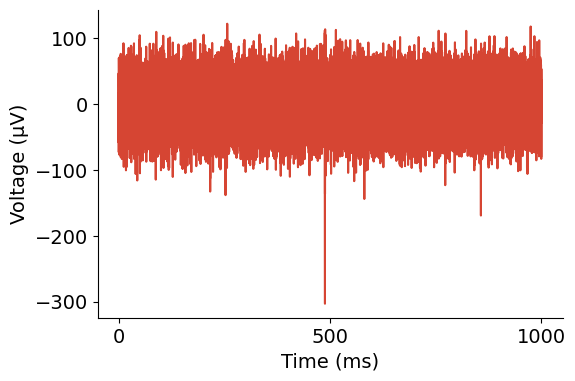

In [108]:
ID_PERIOD_SILI = 31  # 31, 18, 50  # 50, 7
L5_SITE_SILI = 0

# set period
# get trace
L2_3_site_sili = np.where(layers_sili == "L2_3")[0][L5_SITE_SILI]

# plot
fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)

# calculate one seconde period
one_sec_period = np.arange(
    (ID_PERIOD_SILI - 1) * SFREQ_SILICO, ID_PERIOD_SILI * SFREQ_SILICO, 1
)
ax.plot(traces_sili[one_sec_period, L2_3_site_sili], color=COLOR_S)

# legend
ax.spines[["right", "top"]].set_visible(False)
ax.set_ylabel("Voltage (\u03bcV)")
ax.set_xlabel("Time (ms)")
plt.xticks([0, SFREQ_SILICO / 2, SFREQ_SILICO])
ax.set_xticklabels([0, 500, 1000])

# save
# plt.savefig("figures/2_realism/1_components/svg/horvath/horvath_sili_components.svg")

### In vivo

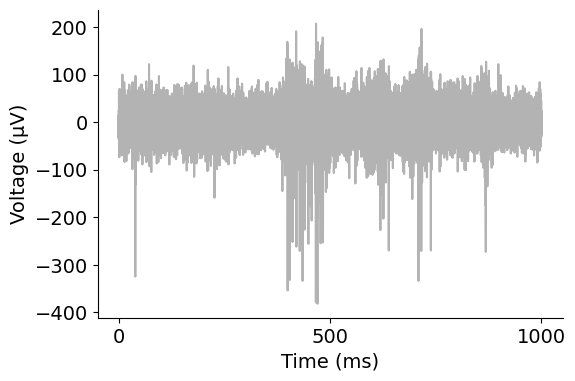

In [109]:
# get traces
Recording_vivo = si.load_extractor(PREP_PATH_vivo)
traces_vivo = Recording_vivo.get_traces()

# get a site in layer 5
layers_vivo = Recording_vivo.get_property("layers")
L2_3_site_vivo = np.where(layers_vivo == "L2_3")[0][L5_SITE_VIVO]

# plot
fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)

# calculate one seconde period
one_sec_period = np.arange(
    (ID_PERIOD_VIVO - 1) * SFREQ_VIVO, ID_PERIOD_VIVO * SFREQ_VIVO, 1
)
ax.plot(traces_vivo[one_sec_period, L2_3_site_vivo], color=COLOR_VIVO)

# legend
ax.spines[["right", "top"]].set_visible(False)
ax.set_ylabel("Voltage (\u03bcV)")
ax.set_xlabel("Time (ms)")
# ax.set_box_aspect(1)
plt.xticks([0, SFREQ_VIVO / 2, SFREQ_VIVO])
ax.set_xticklabels([0, 500, 1000])

# save
plt.savefig("figures/2_realism/1_components/pdf/horvath/horvath_vivo_components.pdf")
plt.savefig("figures/2_realism/1_components/svg/horvath/horvath_vivo_components.svg")

# References

(1) https://probeinterface.readthedocs.io/en/stable/examples/ex_05_device_channel_indices.html 

(2) https://spikeinterface.readthedocs.io/en/latest/modules/core/plot_4_waveform_extractor.html 